# Function to read and plot Frequency spectrum in 1/3 octaves
To run this file change the variable "folder_path" to the path where the audios you need to plot are stored.

In [8]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def compute_third_octave_bands(y, sr, fmin=50, fmax=8000):
    # Calculate the STFT of the audio signal
    S = np.abs(librosa.stft(y))
    
    # Frequency bins
    freqs = librosa.fft_frequencies(sr=sr)
    
    # Define center frequencies for 1/3 octave bands
    center_frequencies = np.array([50, 63, 80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000])
    
    # Filter the center frequencies within the specified range
    center_frequencies = center_frequencies[(center_frequencies >= fmin) & (center_frequencies <= fmax)]
    
    # Calculate the 1/3 octave band levels
    band_levels = []
    for f0 in center_frequencies:
        # Calculate the lower and upper frequencies for the 1/3 octave band
        f_lower = f0 / (2 ** (1 / 6))
        f_upper = f0 * (2 ** (1 / 6))
        
        # Find the indices of the frequency bins within this band
        band_indices = np.where((freqs >= f_lower) & (freqs <= f_upper))[0]
        
        # Calculate the mean energy in this band
        band_energy = np.mean(S[band_indices, :], axis=0)
        
        # Convert to dB
        band_level = 10 * np.log10(np.mean(band_energy**2))
        band_levels.append(band_level)
    
    return center_frequencies, band_levels

def plot_third_octave_bands(center_frequencies, band_levels):
    plt.bar(center_frequencies, band_levels, width=10, edgecolor='k', align='center')
    plt.xscale('log')
    plt.xticks(center_frequencies, labels=center_frequencies, rotation=45)
    plt.xlabel('1/3-octave band center frequency, Hz')
    plt.ylabel('Sound pressure level, dB')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Replace 'your_audio_file.wav' with the path to your own audio file
y, sr = librosa.load('your_audio_file.wav')

# Compute the 1/3 octave band levels
center_frequencies, band_levels = compute_third_octave_bands(y, sr)

# Plot the 1/3 octave band levels
plot_third_octave_bands(center_frequencies, band_levels)



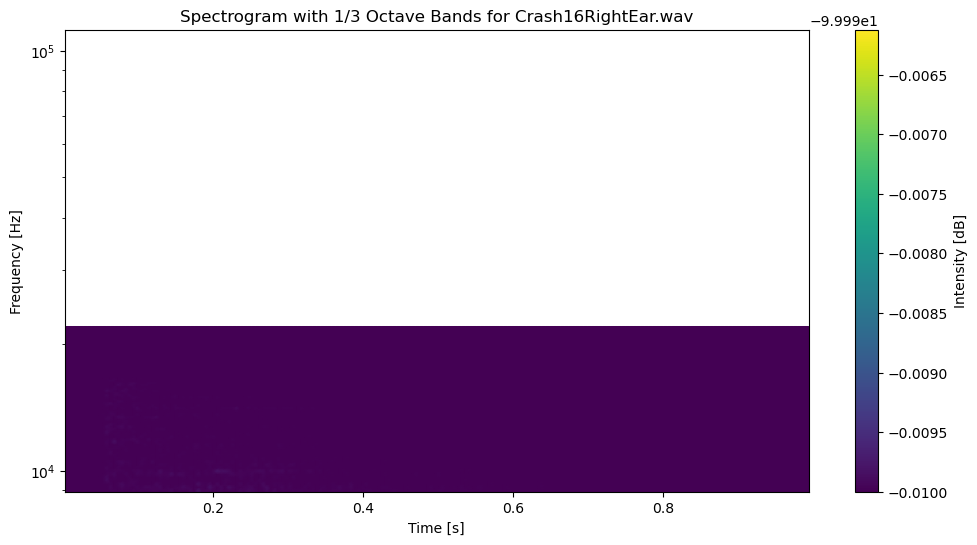

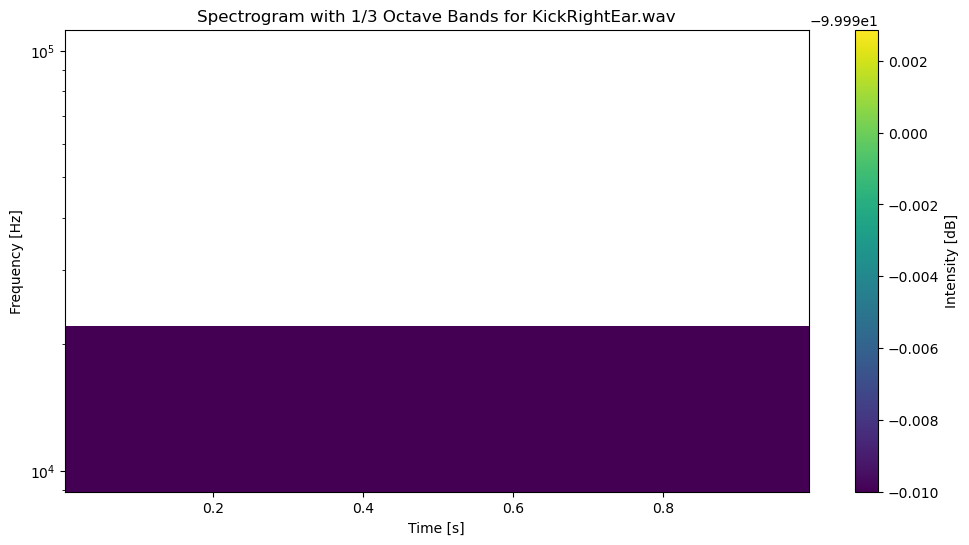

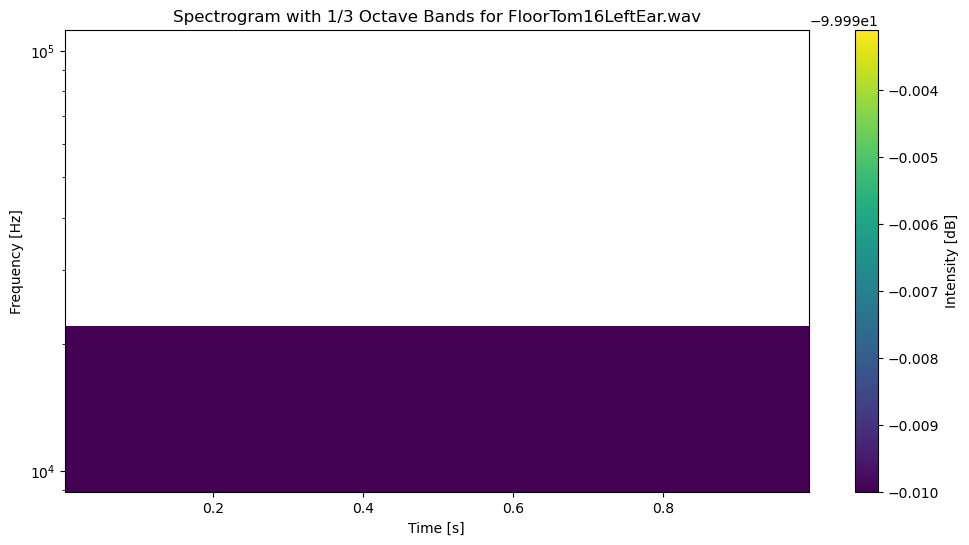

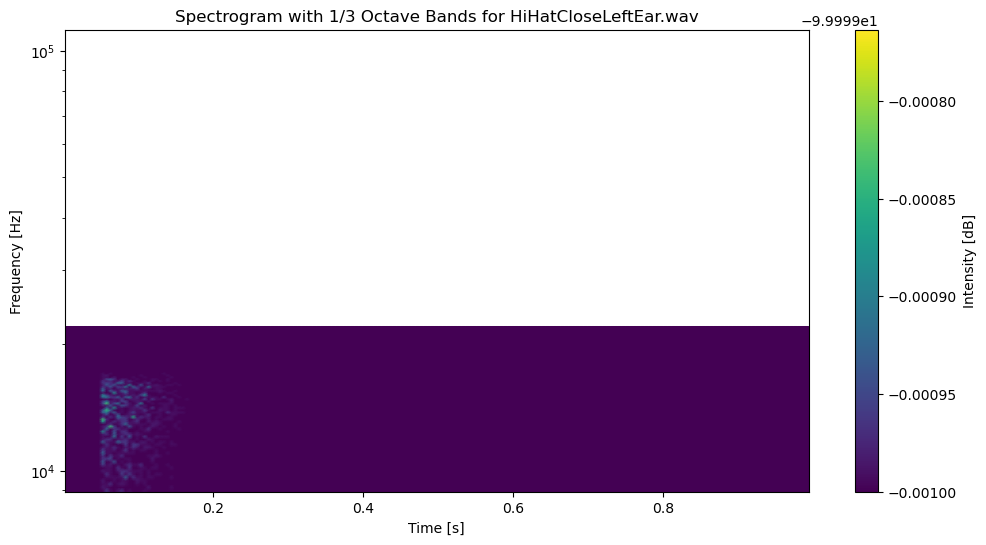

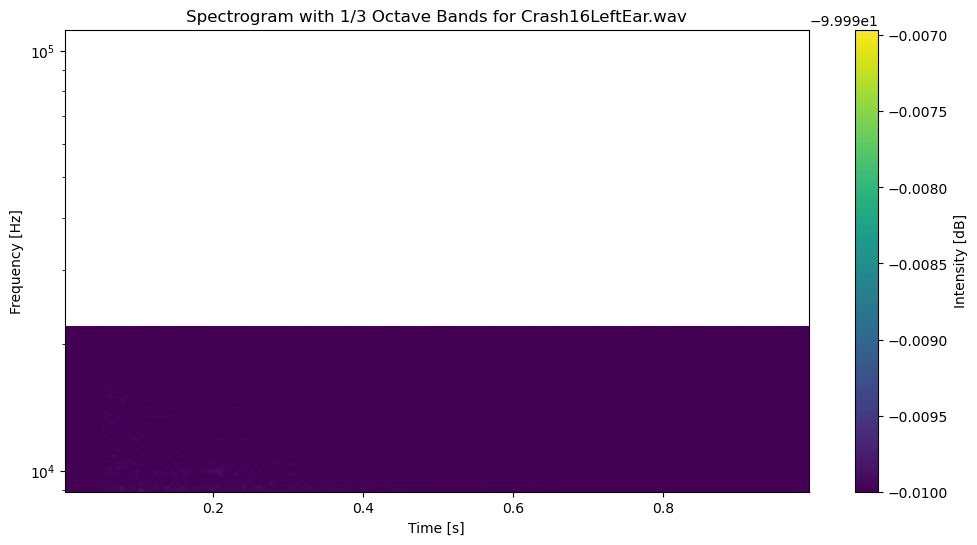

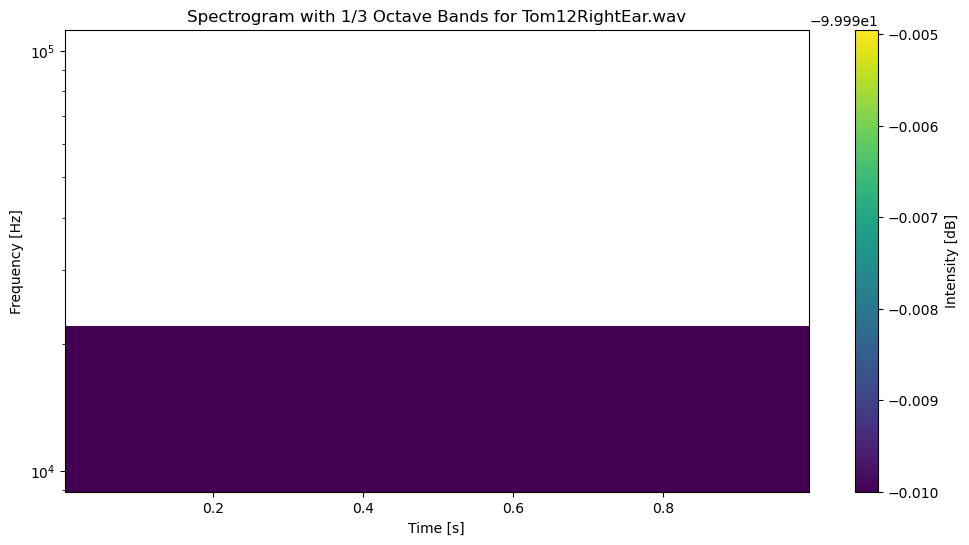

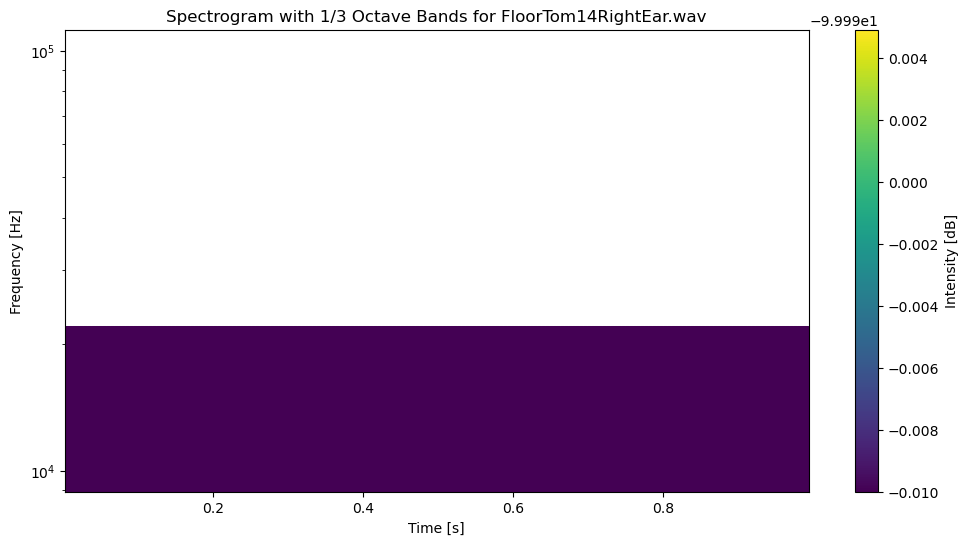

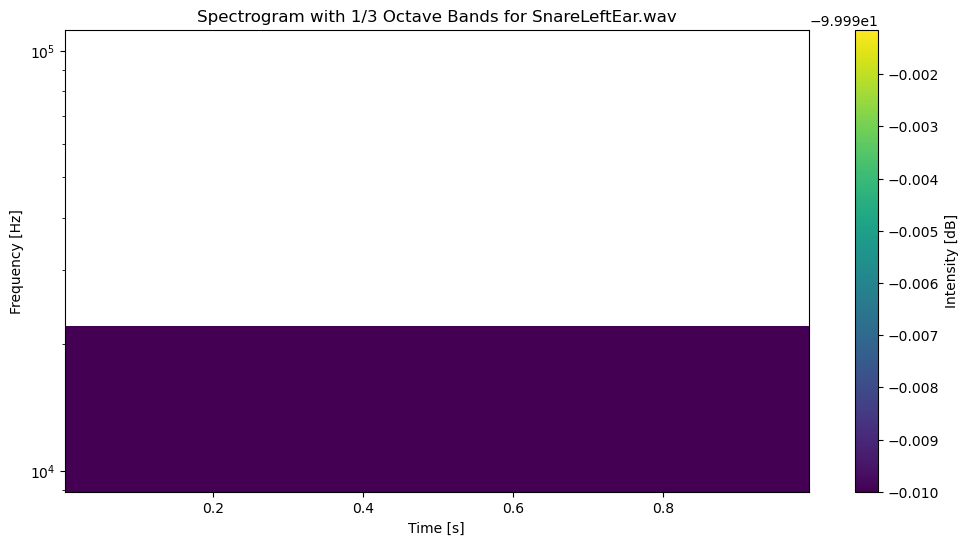

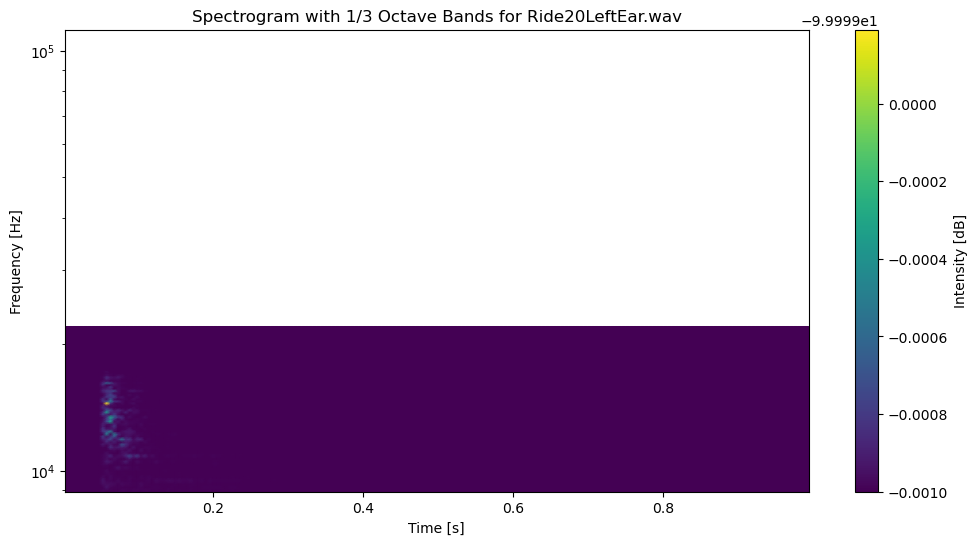

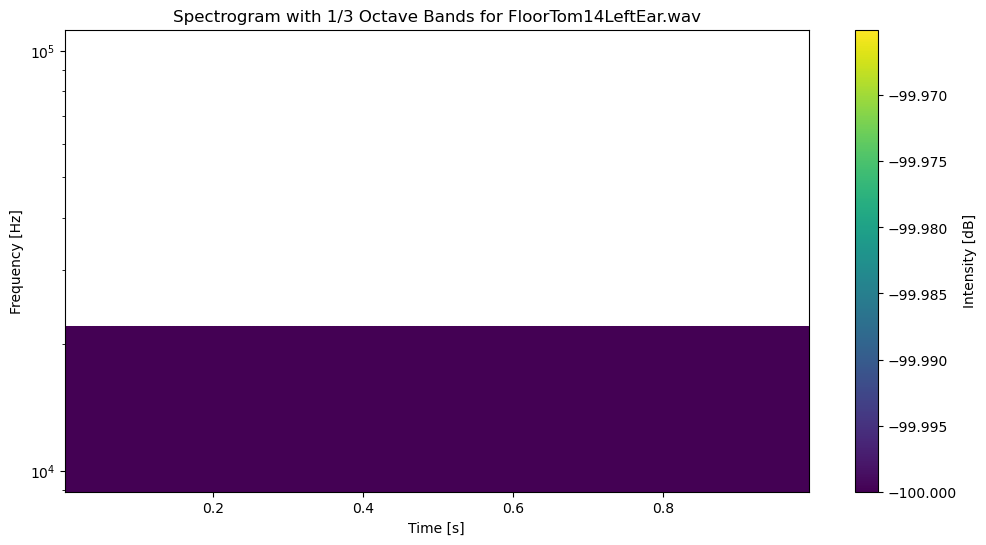

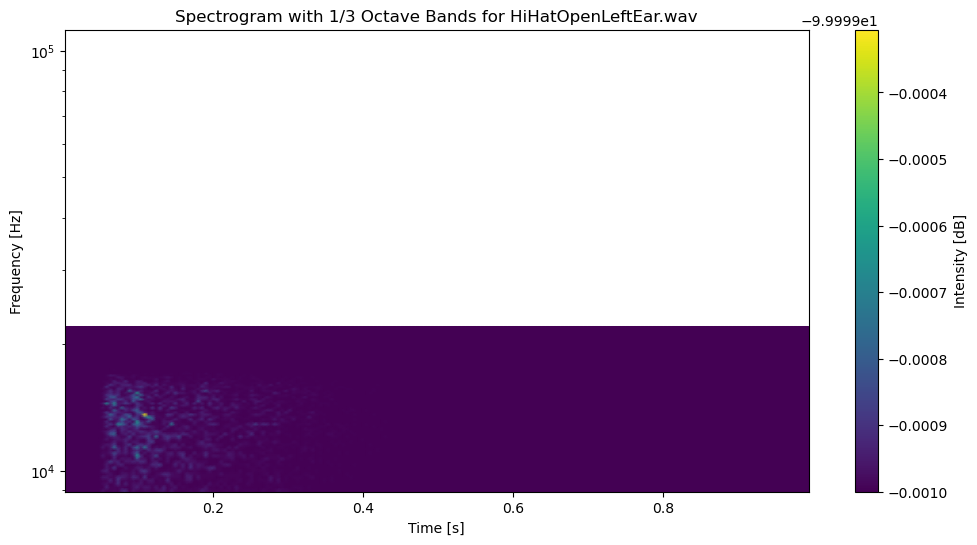

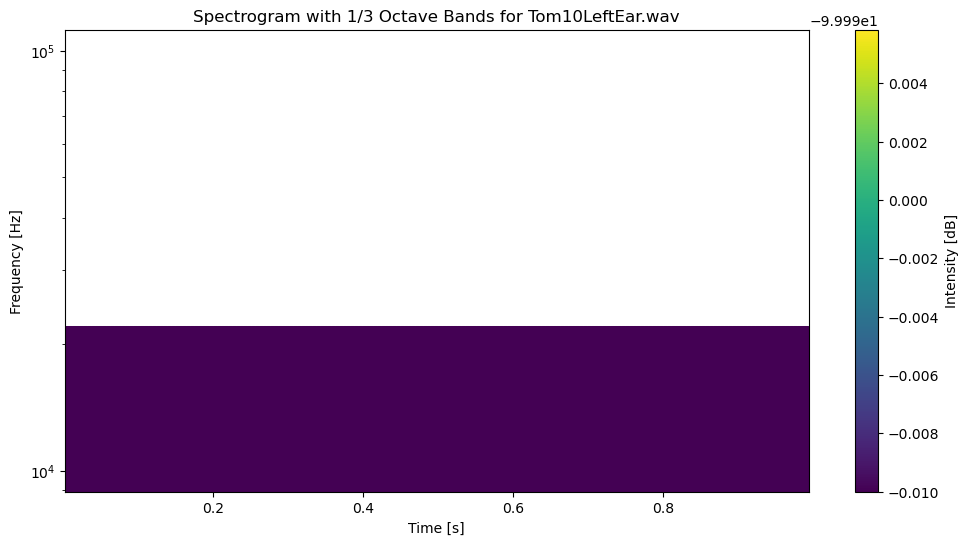

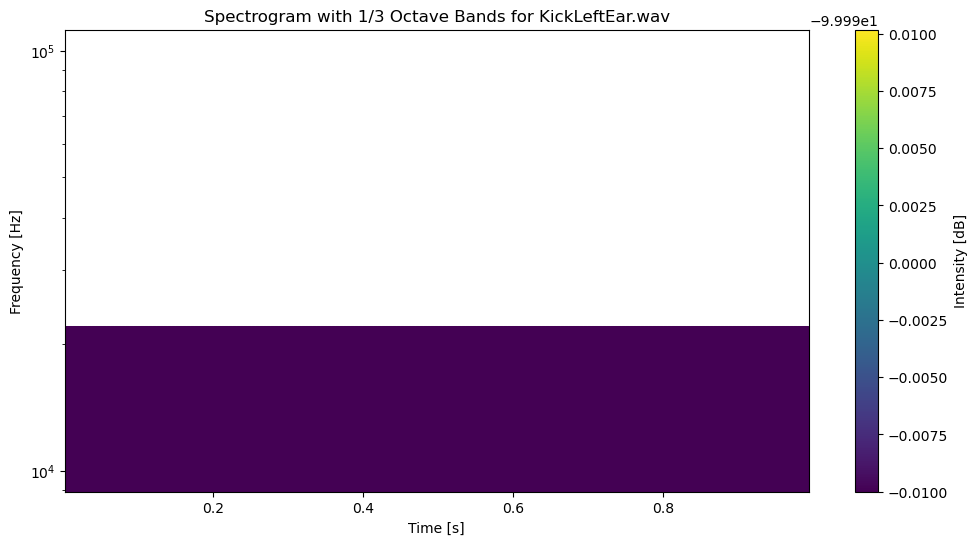

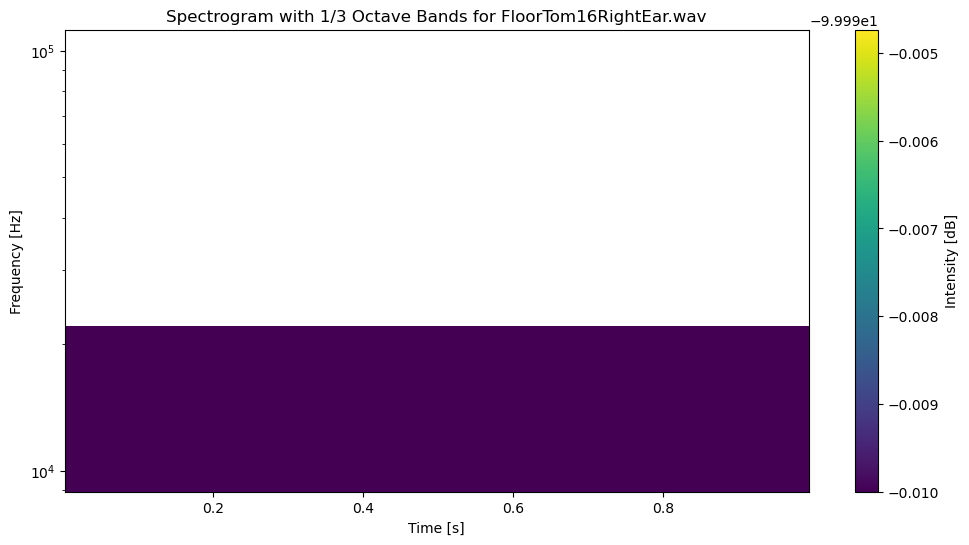

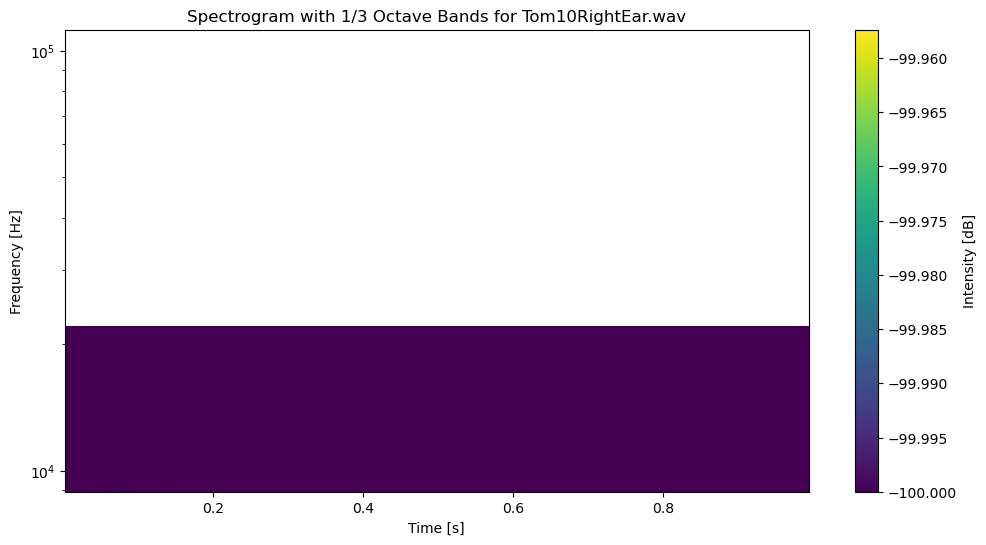

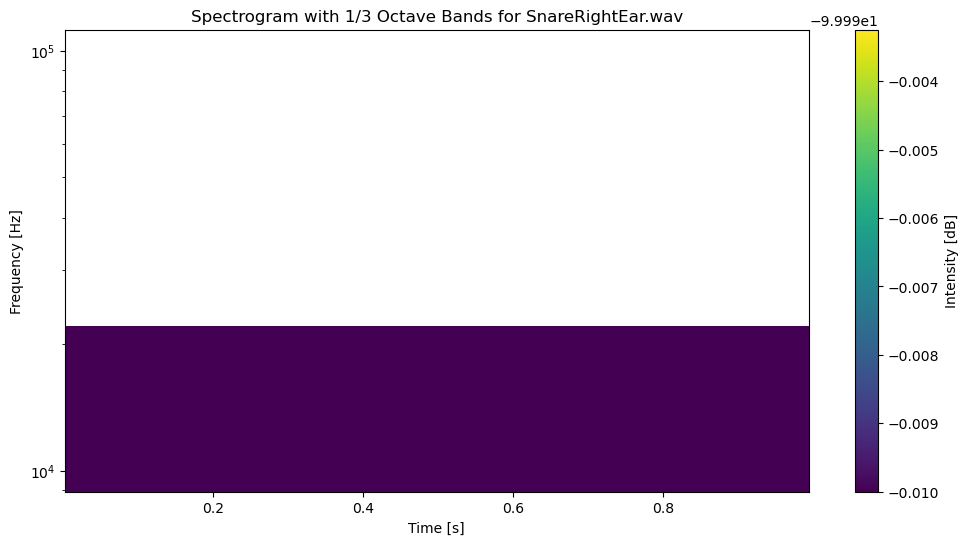

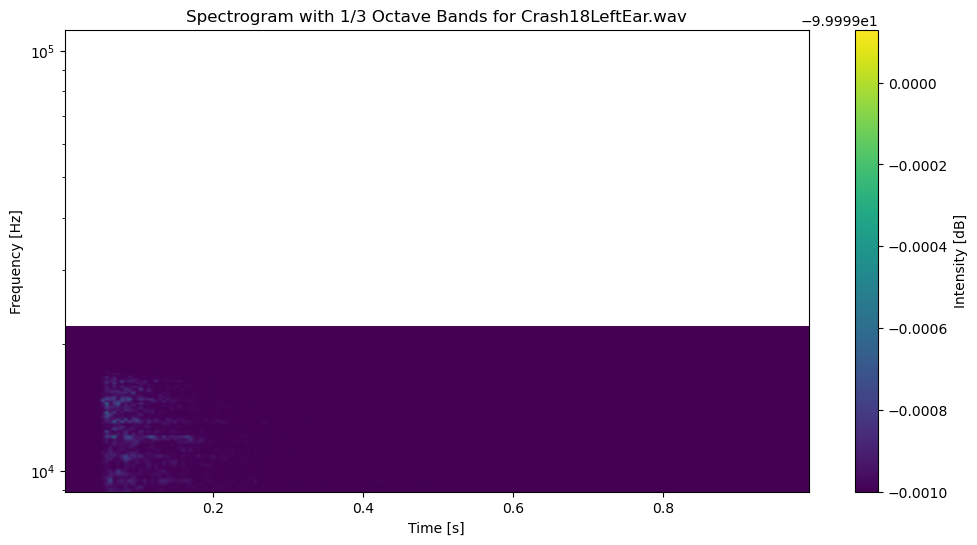

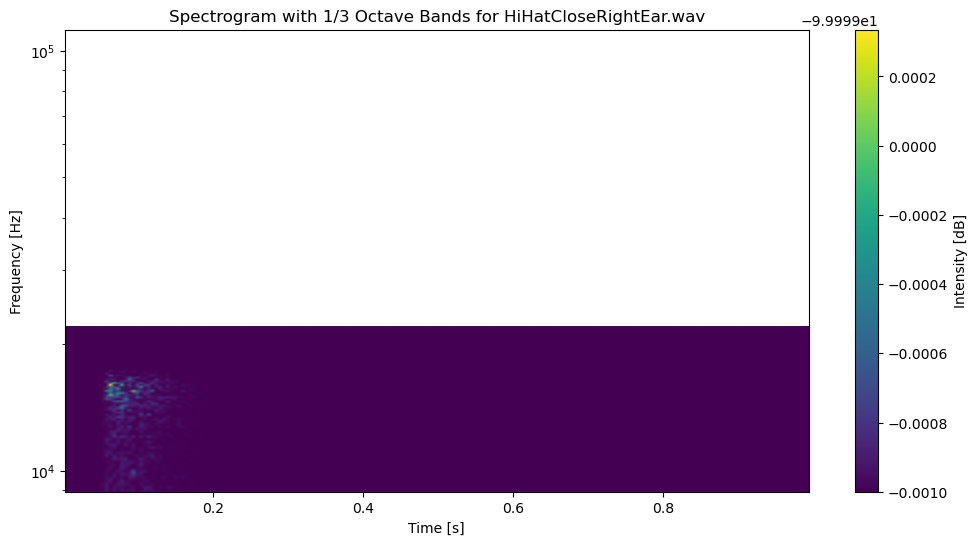

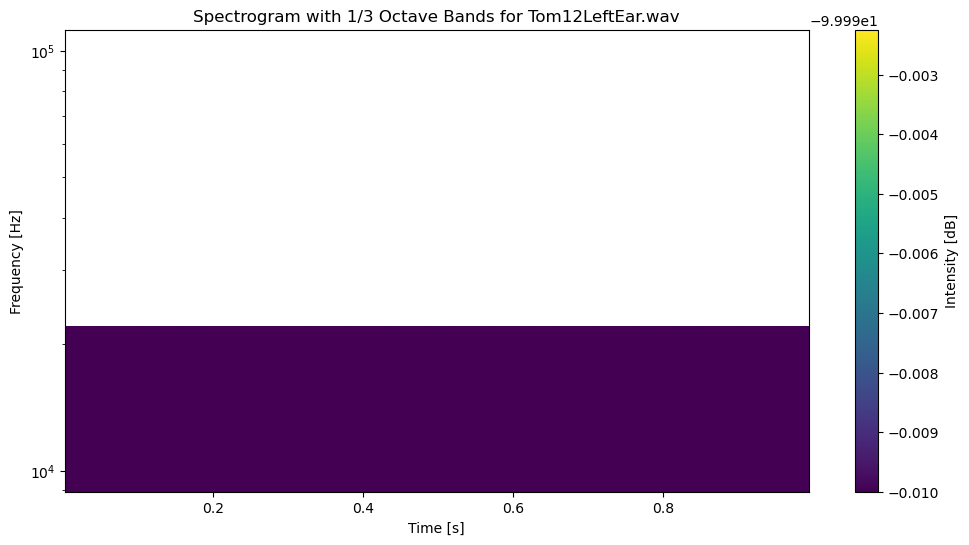

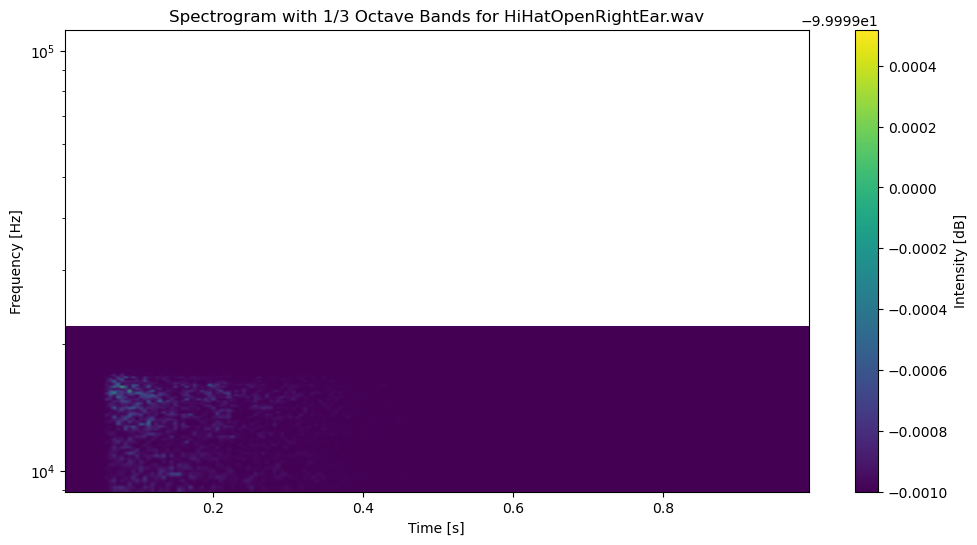

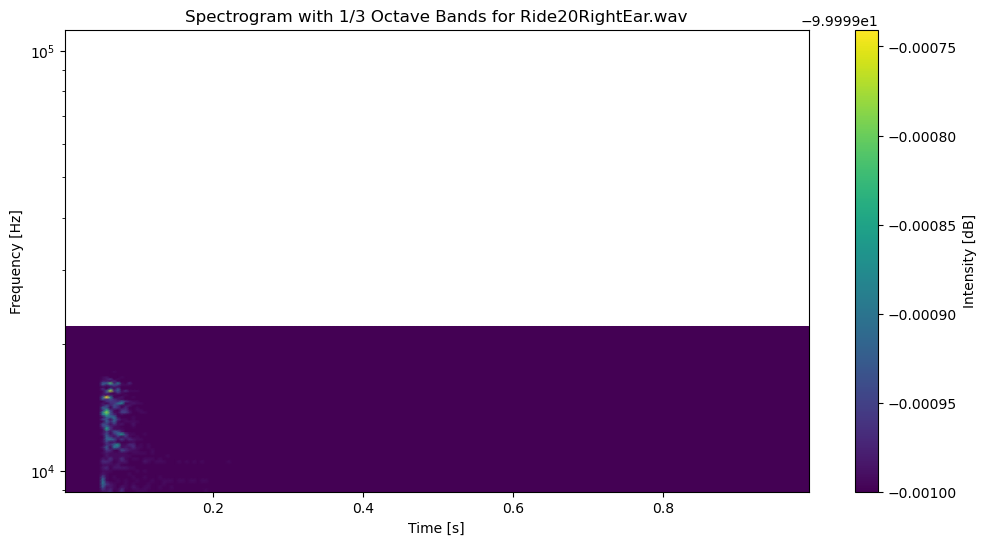

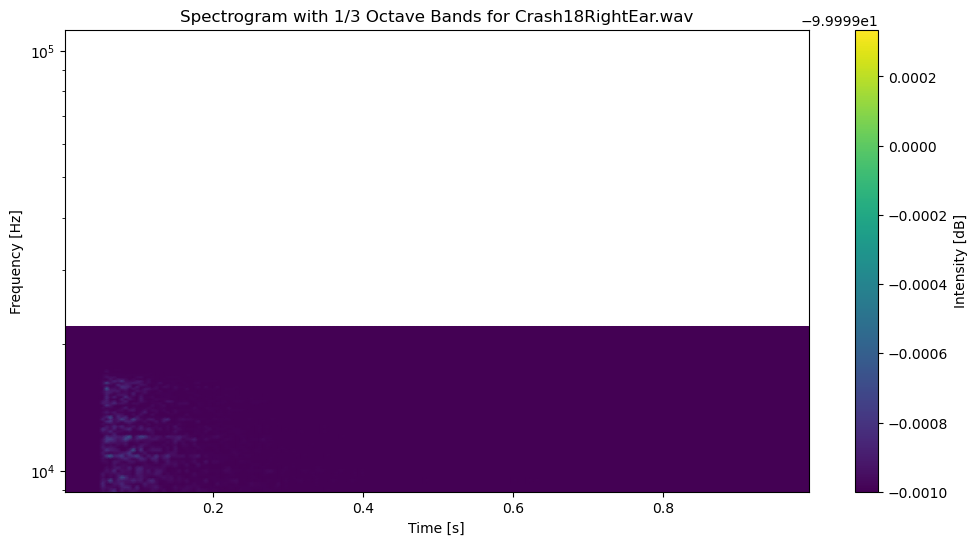

In [9]:
# To call this function use the following lines:

#Path to the folder containing audio files
folder_path = '/Users/chiaravald/Desktop/ACUS340/Audios_Drums'

read_and_plot_octave_bands(folder_path)